In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
%matplotlib inline

Let's say person A **actually** has a "reaction distance" of 20 cm

In [3]:
d = 20 # true value

Because our **measurements** aren't perfect, we want a way to quantify our best **measured** estimate for person A's reaction time (which will likely differ from 20 cm, and a quantitative measure of how confident we are in that reported value. It turns out that there are different types of errors, and we need to understand them in order to figure out the best way to beat them down if we want to obtain accurate, reliable data. We will discuss three important sources of error:

## Random Error

Measurements add errors onto the quantities we're trying to measure. You may have heard that often random variations (e.g., people's heights) follow a Gaussian or "normal" distribution. A normal distribution has a mean $\mu$ and a width $\sigma$. If errors are **random**, then we should expect them to be positive or negative with equal probability, so what should the mean be?

The width of the distribution $\sigma$ depends on how precise your measurement procedure/device is. Let's just choose a value and quantify things later:

Text(0, 0.5, 'Probability density')

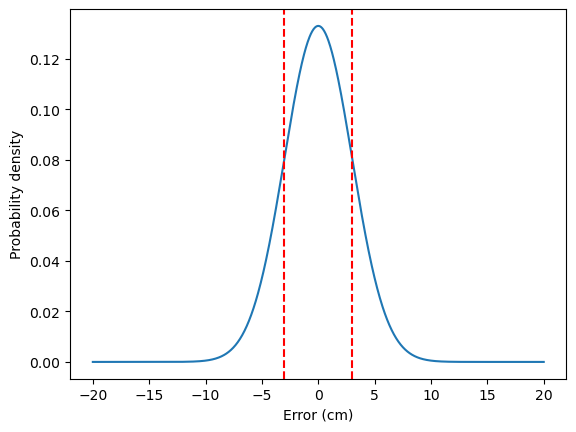

In [4]:
sigma=3 # cm
mu=0
derr = np.linspace(-20,20,1000)
pdf = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(derr-mu)**2/2/sigma**2) # equation for a gaussian

fig, ax = plt.subplots()
ax.plot(derr, pdf)
ax.axvline(sigma, c='r', linestyle='--')
ax.axvline(-sigma, c='r', linestyle='--')
ax.set_xlabel('Error (cm)')
ax.set_ylabel('Probability density')

We can now simulate taking a measurement by taking the true value $d$, and **drawing** a random error according to this probability distribution. Perhaps the first time we run the experiment we measure

In [5]:
d = 20 # true value
d + np.random.normal(scale=sigma)

25.292157037902992

We don't know the true value is 20, we just measure 25.3 cm. Notice from the plot above that getting a value 5.3 cm too high was a low probability event. But since the errors are random, we have no reason to think it's more likely that we got a value that was too high, we could have just as easily got a number that was too low. 

So from our **one measurement** we would give our result as $25.3 \pm 3$ cm. It's going to become really important in a moment what we mean by this uncertainty of $\pm 3$ cm, so let's be really explicit. This is **the uncertainty for a single trial**: our best guess for the range of values that we would predict **you** would get, if you redid my experiment exactly one time. 

If we simulate you taking another measurement by running the cell above again, wee see that it's not too bad, it's about 4 cm away. That's a bit lucky right? We could have easily drawn a negative error, in which case we'd have been way off. That's life--sometimes we get unlucky. It's still useful in the sense that we communicate that you're unlikely to get something within say 1 cm of $25.3$ cm, but also unlikely to be more than 10 cm from our reported value.

OK, but in this toy example we knew the width of the errors ahead of time. It's like we had a measurement apparatus that had a $\pm 3$ cm sticker on the side of it. In reality we rarely know what our errors are ahead of time, and we need to estimate how large they are. 

How could we empirically estimate the errors in our experiment?

In [6]:
measurements = d + np.random.normal(scale=sigma, size=10)
measurements

array([22.93621395, 26.7226796 , 25.60267397, 17.06816636, 22.85026525,
       19.54592838, 19.69034344, 21.23179551, 20.43213071, 24.36282052])

Text(0, 0.5, 'Number of values')

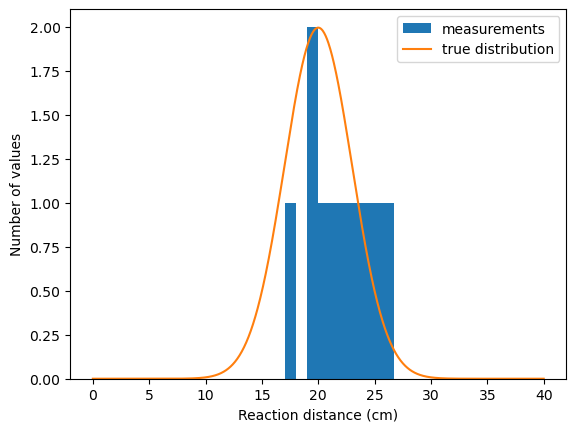

In [79]:
fig, ax = plt.subplots()
vals, bins, patches = ax.hist(measurements, label='measurements')
ax.plot(d + derr, pdf*15, label='true distribution')
ax.legend()
ax.set_xlabel('Reaction distance (cm)')
ax.set_ylabel('Number of values')

# Mean and Standard Deviation

In [80]:
measurements.mean()

22.04430176932319

In [81]:
measurements.std()

2.849105481847032

# The power of averages

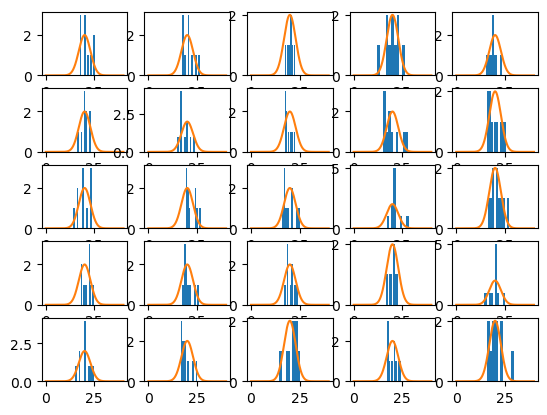

In [87]:
Nexperiments=25
Ncols = 5
ms = np.array([d + np.random.normal(scale=sigma, size=10) for i in range(Nexperiments)])

fig, axarr = plt.subplots(nrows=Ncols, ncols=Ncols)
for i in range(Ncols):
    for j in range (Ncols):
        vals, bins, patches = axarr[i,j].hist(ms[5*i+j])
        axarr[i,j].plot(d + derr, pdf*15)

Text(0, 0.5, 'Number of values')

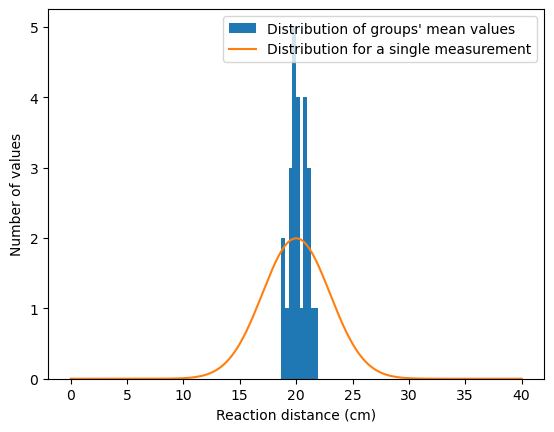

In [93]:
means = [m.mean() for m in ms]
fig, ax = plt.subplots()
ax.hist(means, label="Distribution of groups' mean values")
ax.plot(d + derr, pdf*15, label="Distribution for a single measurement")
ax.legend()
ax.set_xlabel('Reaction distance (cm)')
ax.set_ylabel('Number of values')